In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ammaarahmad1999/Time_Series_Dataset/main/rainfall.csv")

In [311]:
len(df['State'].value_counts().index)

35

In [312]:
len(df['District'].value_counts().index)

574

In [ ]:
df

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
0,Andaman & Nicobar Islands,Andaman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsAndaman
1,Andaman & Nicobar Islands,Nicobar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Andaman & Nicobar IslandsNicobar
2,Andhra Pradesh,Adilabad,1901.0,6.725,10.488,23.288,35.560,23.119,115.546,294.119,276.865,181.615,47.310,1.339,0.000,Andhra PradeshAdilabad
3,Andhra Pradesh,Adilabad,1902.0,0.420,0.000,0.388,6.070,3.331,45.960,233.973,167.971,198.177,26.447,35.083,11.222,Andhra PradeshAdilabad
4,Andhra Pradesh,Adilabad,1903.0,6.643,1.956,0.173,4.551,33.348,132.078,436.611,334.544,226.037,138.818,14.095,8.823,Andhra PradeshAdilabad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55314,West Bengal,North Dinajpur,2000.0,11.294,10.908,10.686,27.669,110.618,264.845,185.798,297.535,280.883,22.048,0.568,0.423,West BengalNorth Dinajpur
55315,West Bengal,North Dinajpur,2001.0,1.866,4.048,21.805,36.436,152.242,164.361,311.196,271.373,165.015,124.258,2.798,0.000,West BengalNorth Dinajpur
55316,West Bengal,North Dinajpur,2002.0,14.939,3.758,12.410,54.591,80.993,189.604,276.109,285.924,215.591,108.733,17.757,0.000,West BengalNorth Dinajpur
55317,Lakshadweep,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LakshadweepLakshadweep


In [ ]:
df_ranchi = df[(df['District'] == 'Ranchi')]

In [ ]:
df_ranchi

,State,District,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,vlookup
19491,Jharkhand,Ranchi,1901.0,55.743,70.255,5.934,16.315,29.990,74.341,221.620,289.332,275.567,24.645,14.958,0.000,JharkhandRanchi
19492,Jharkhand,Ranchi,1902.0,13.536,6.158,7.024,24.836,25.899,80.481,284.795,244.662,309.031,13.795,0.909,8.336,JharkhandRanchi
19493,Jharkhand,Ranchi,1903.0,9.275,28.976,6.931,6.868,35.605,109.292,217.854,210.821,204.182,105.219,1.346,0.311,JharkhandRanchi
19494,Jharkhand,Ranchi,1904.0,0.828,10.263,52.148,0.877,168.352,206.350,347.718,517.345,106.275,58.478,1.474,2.087,JharkhandRanchi
19495,Jharkhand,Ranchi,1905.0,9.936,39.507,60.503,39.821,45.133,35.294,393.556,305.438,413.919,21.584,0.000,1.730,JharkhandRanchi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19588,Jharkhand,Ranchi,1998.0,26.469,56.556,11.976,18.625,77.751,99.850,215.885,231.133,209.902,202.751,25.762,0.000,JharkhandRanchi
19589,Jharkhand,Ranchi,1999.0,15.823,10.188,0.199,0.228,66.897,153.430,279.254,419.334,190.409,36.214,4.004,0.000,JharkhandRanchi
19590,Jharkhand,Ranchi,2000.0,7.690,63.409,0.199,28.614,33.204,205.837,158.763,190.652,197.848,13.564,2.496,0.498,JharkhandRanchi
19591,Jharkhand,Ranchi,2001.0,1.282,2.348,50.707,19.210,31.212,158.582,235.194,331.582,76.509,94.283,6.564,0.000,JharkhandRanchi


In [ ]:
df_ranchi.drop(columns = ['State', 'District', 'vlookup'], inplace = True)

In [ ]:
df_ranchi['Year'] = df_ranchi['Year'].astype(int)

In [ ]:
df_ranchi.reset_index(drop = True, inplace = True)

In [ ]:
df_ranchi

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1901,55.743,70.255,5.934,16.315,29.990,74.341,221.620,289.332,275.567,24.645,14.958,0.000
1,1902,13.536,6.158,7.024,24.836,25.899,80.481,284.795,244.662,309.031,13.795,0.909,8.336
2,1903,9.275,28.976,6.931,6.868,35.605,109.292,217.854,210.821,204.182,105.219,1.346,0.311
3,1904,0.828,10.263,52.148,0.877,168.352,206.350,347.718,517.345,106.275,58.478,1.474,2.087
4,1905,9.936,39.507,60.503,39.821,45.133,35.294,393.556,305.438,413.919,21.584,0.000,1.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1998,26.469,56.556,11.976,18.625,77.751,99.850,215.885,231.133,209.902,202.751,25.762,0.000
98,1999,15.823,10.188,0.199,0.228,66.897,153.430,279.254,419.334,190.409,36.214,4.004,0.000
99,2000,7.690,63.409,0.199,28.614,33.204,205.837,158.763,190.652,197.848,13.564,2.496,0.498
100,2001,1.282,2.348,50.707,19.210,31.212,158.582,235.194,331.582,76.509,94.283,6.564,0.000


In [ ]:
month = df_ranchi.columns
keys = {k: v for v, k in enumerate(month)}
month = month[1:]

In [ ]:
df1 = pd.melt(df_ranchi, id_vars='Year', value_vars=month, value_name='y').rename(columns = {'variable' : 'month'})
df1['month'] = df1['month'].replace(keys)
df1 = df1.sort_values(['Year', 'month'])
df1['Day'] = 28

In [ ]:
import datetime
df1['ds'] = pd.to_datetime(df1[["Year", "month", "Day"]])

In [ ]:
df1.set_index(['ds'], inplace = True)
df1 = df1.asfreq('M', method='ffill')

In [ ]:
df1

,Year,month,y,Day
ds,,,,
1901-01-31,1901,1,55.743,28
1901-02-28,1901,2,70.255,28
1901-03-31,1901,3,5.934,28
1901-04-30,1901,4,16.315,28
1901-05-31,1901,5,29.990,28
...,...,...,...,...
2002-07-31,2002,7,219.608,28
2002-08-31,2002,8,378.858,28
2002-09-30,2002,9,186.822,28


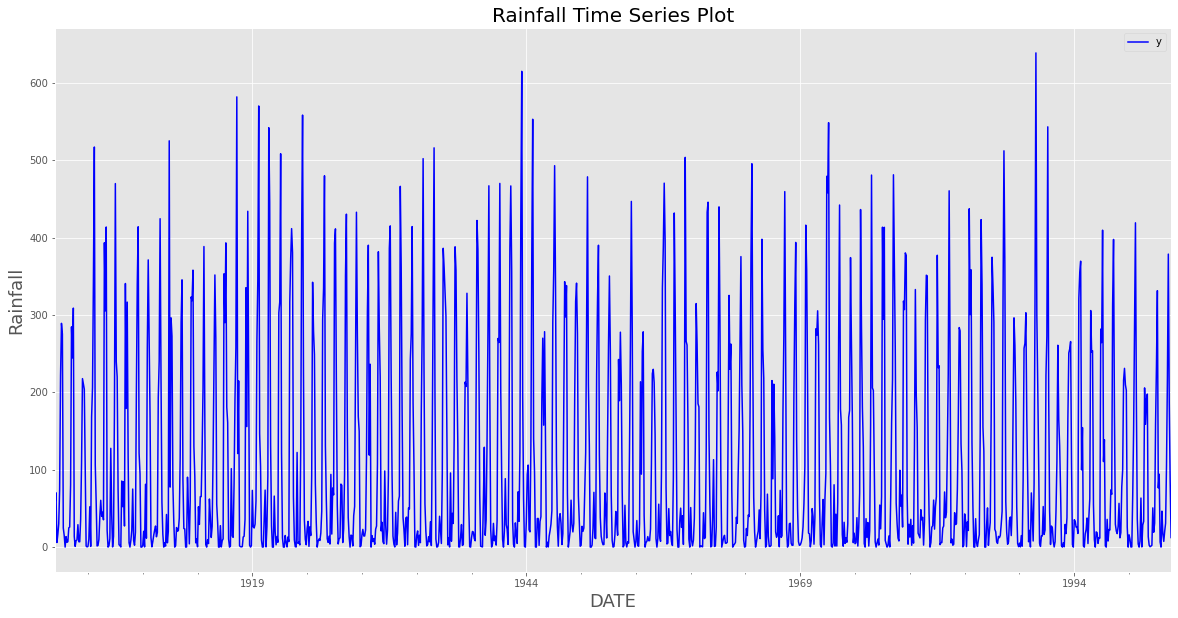

In [ ]:
axl = df1.plot(kind='line', y='y', color='blue', figsize=(20, 10))
plt.title('Rainfall Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('Rainfall', size=18)
plt.show()

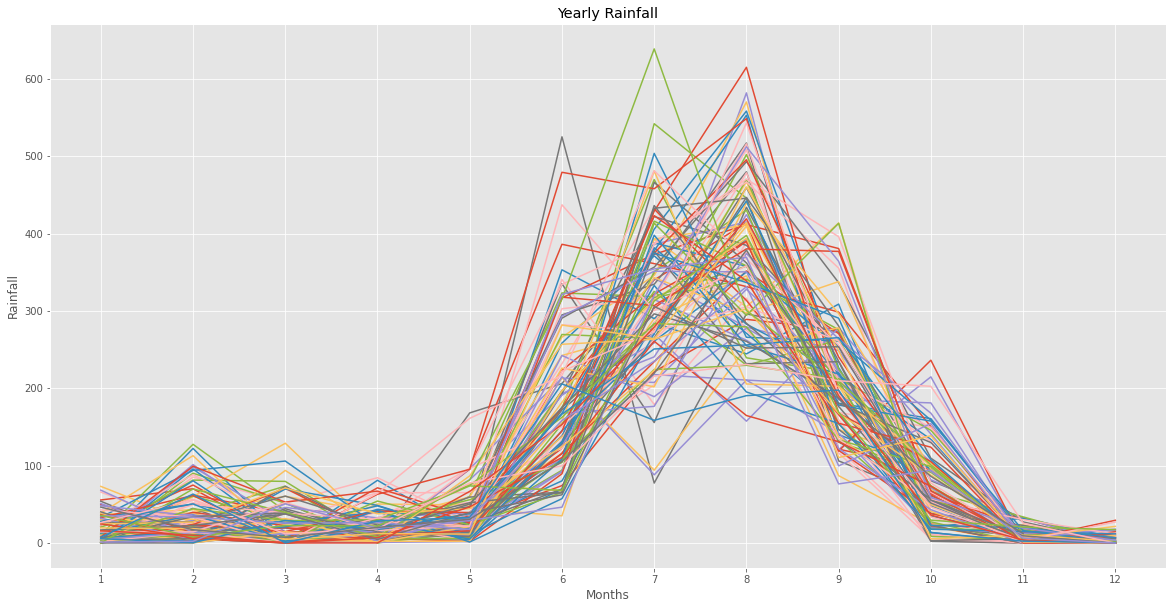

In [313]:
pivot = pd.pivot_table(df1, values='y', index='month', columns='Year', aggfunc='mean')
pivot.plot(figsize=(20,10))
plt.title('Yearly Rainfall')
plt.xlabel('Months')
plt.ylabel('Rainfall')
plt.xticks([x for x in range(1,13)])
plt.legend().remove()
plt.show()

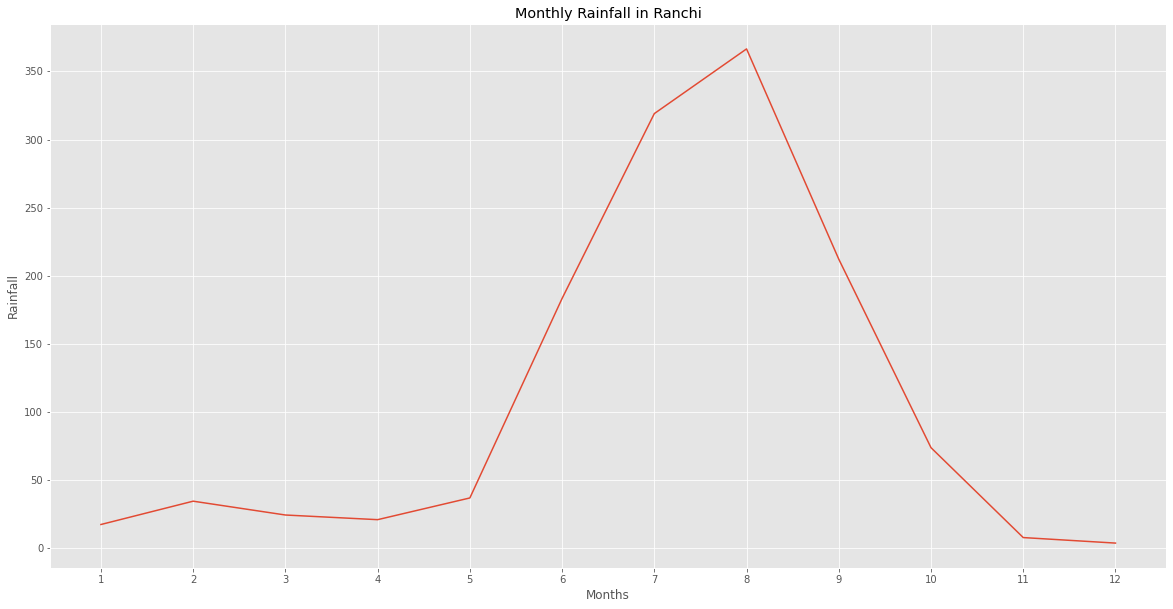

In [314]:
monthly_seasonality = pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,10))
plt.title('Monthly Rainfall in Ranchi')
plt.xlabel('Months')
plt.ylabel('Rainfall')
plt.xticks([x for x in range(1,13)])
plt.show()

**Conclusion: There is seasonility in Rainfall with most rainfall happening from May to November**

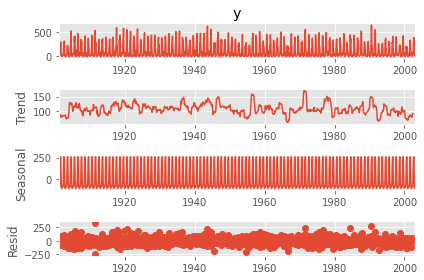

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
components = seasonal_decompose(df1['y'], model='additive')
components.plot();

In [ ]:
year_avg = pd.pivot_table(df1, values='y', index='Year', aggfunc='mean')
year_avg['5 Years MA'] = year_avg['y'].rolling(5).mean()
year_avg['10 Years MA'] = year_avg['y'].rolling(10).mean()

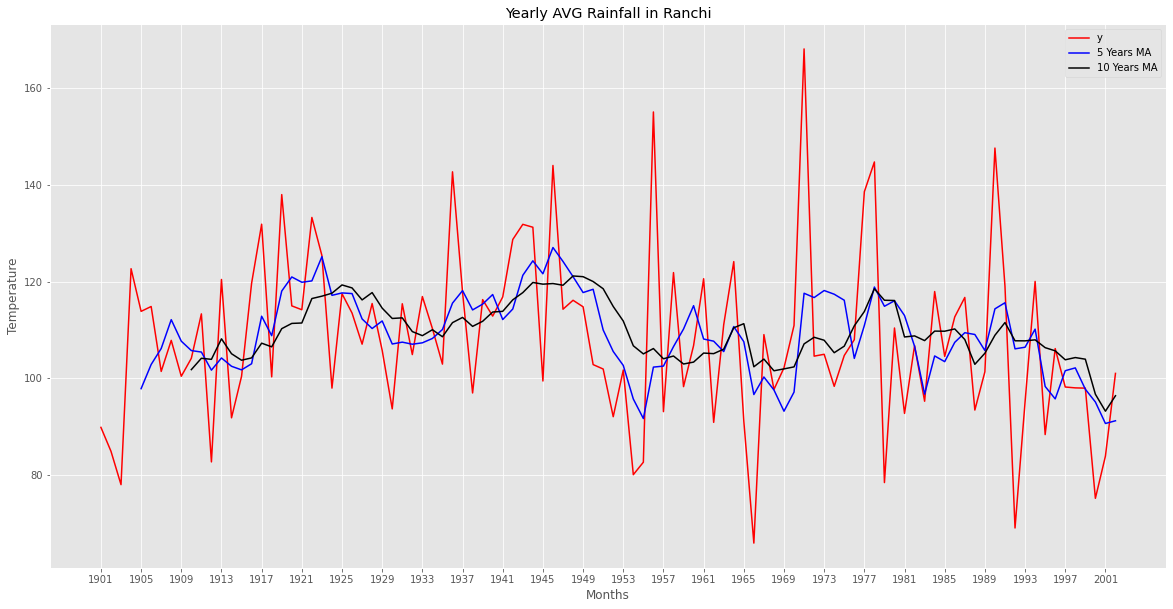

In [ ]:
axl = year_avg.plot(kind='line', y='y', color='red', figsize=(20, 10))
year_avg.plot(kind='line', y='5 Years MA', color='blue', ax = axl)
year_avg.plot(kind='line', y='10 Years MA', color='black', ax = axl)
plt.title('Yearly AVG Rainfall in Ranchi')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks([x for x in range(1901,2002,4)])
plt.show()

In [ ]:
df1

,Year,month,y,Day
ds,,,,
1901-01-31,1901,1,55.743,28
1901-02-28,1901,2,70.255,28
1901-03-31,1901,3,5.934,28
1901-04-30,1901,4,16.315,28
1901-05-31,1901,5,29.990,28
...,...,...,...,...
2002-07-31,2002,7,219.608,28
2002-08-31,2002,8,378.858,28
2002-09-30,2002,9,186.822,28


In [ ]:
train = df1[:-60].copy()
val = df1[-60:].copy()

In [ ]:
val['Baseline'] = val['y'].shift()

In [ ]:
sqrt(mean_squared_error(val['y'][1:],val['Baseline'][1:]))

88.40784702038422

#Our Baseline Model Mean Square Error = 88.4078

In [ ]:
stationary_test = adfuller(df1['y'].values, autolag='AIC')
print(f'P value = {stationary_test[1]}')

P value = 3.7110646679365726e-07


In [ ]:
stationary_test = adfuller(df1['y'].values, autolag='BIC')
print(f'P value = {stationary_test[1]}')

P value = 3.7110646679365726e-07


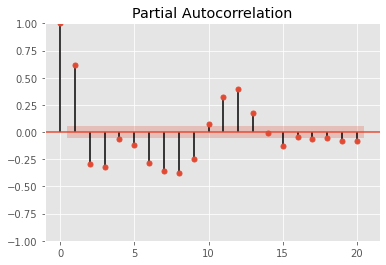

In [ ]:
pacf = plot_pacf(df1['y'].dropna(), lags = 20)

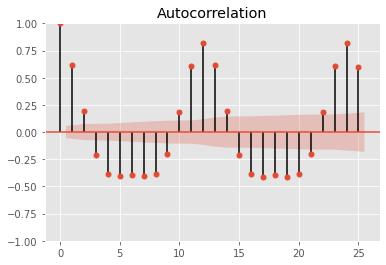

In [ ]:
acf = plot_acf(df1['y'].dropna(), lags = 25)

**Conclusion: ACF Plots shows there is fluctation between positive and negative correlation with repeats depicting Seasonility of 12 as accepted**

In [ ]:
stationary_test = adfuller(df1['y'].diff(12).dropna(), autolag='AIC')
print(f'P value = {stationary_test[1]}')

P value = 5.2811242599321435e-24


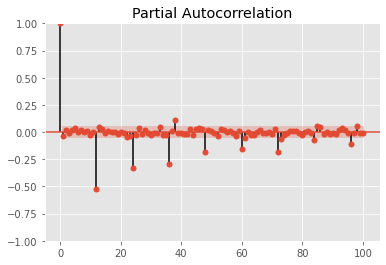

In [ ]:
pacf = plot_pacf(df1['y'].diff(12).dropna(), lags = 100)

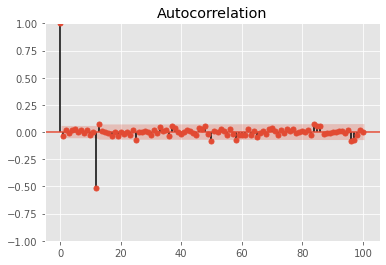

In [ ]:
acf = plot_acf(df1['y'].diff(12).dropna(), lags = 100)

**Conclusion : Both PACF and ACF Plots shows no significance to previous lags except multiple of 12. This clearly shows a seasonality of 12 and ACF shows just a spark at 12 and PACF shows gradual decrease indicating SMA(1) model**

#SARIMA (0,0,0)(0,1,1,12)

In [ ]:
# Fit the model
model = sm.tsa.statespace.SARIMAX(train['y'], order=(0,0,0), seasonal_order=(0,1,1,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                 SARIMAX Results                                  
Dep. Variable:                          y   No. Observations:                 1163
Model:             SARIMAX(0, 1, [1], 12)   Log Likelihood               -6344.781
Date:                    Thu, 02 Dec 2021   AIC                          12693.563
Time:                            10:18:17   BIC                          12703.660
Sample:                        01-31-1901   HQIC                         12697.374
                             - 11-30-1997                                         
Covariance Type:                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L12      -0.9710      0.008   -115.375      0.000      -0.988      -0.955
sigma2      3486.6616     79.340     43.946      0.000    3331.157    3642.166
Ljung-Box (L1) (Q): 

In [ ]:
start=len(train)
end=len(train)+len(val)-1
predictions = model_fit.predict(start = start, end = end, dynamic = False)

In [ ]:
val['prediction'] = predictions

In [ ]:
sqrt(mean_squared_error(val['y'], val['prediction']))

54.64101936515731

In [ ]:
rainfall_std = df1['y'].std()
rainfall_std

136.67362778426596

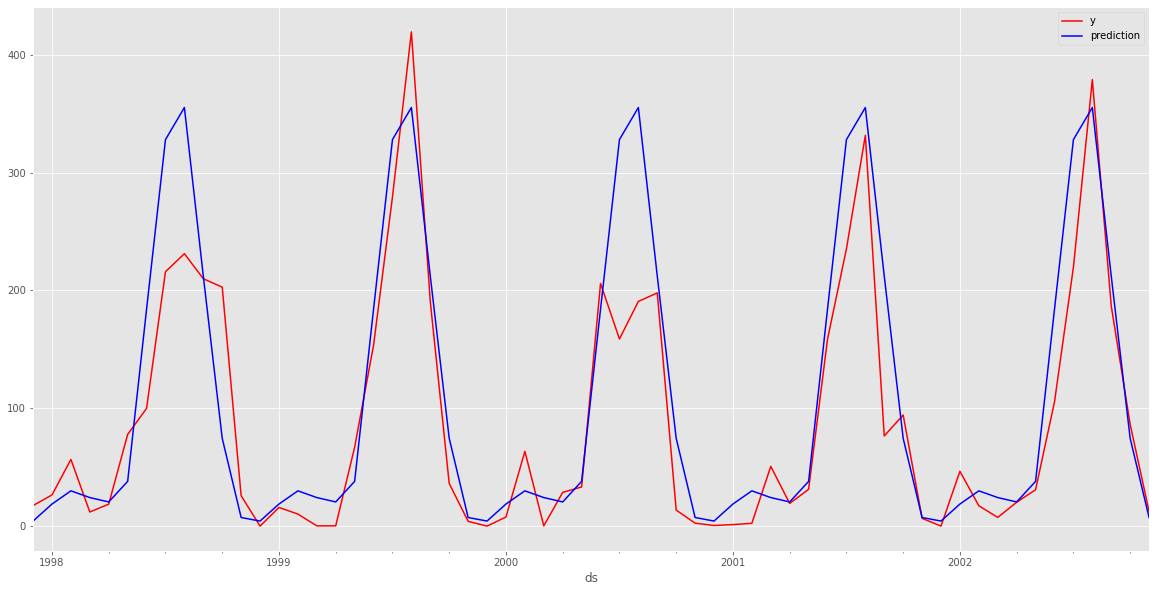

In [ ]:
axl = val.plot(kind='line', y='y', color='red', figsize=(20, 10))
val.plot(kind='line', y='prediction', color='blue', ax = axl)

In [ ]:
val['residual'] = val['prediction'] - val['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(val['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.008799555135294401


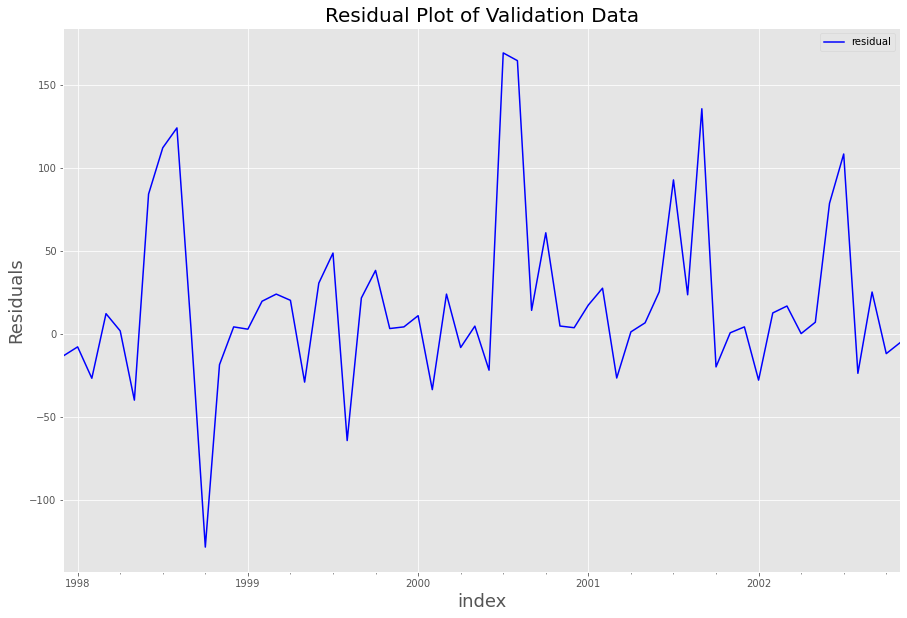

In [ ]:
axl = val.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

In [ ]:
adf = adfuller(val['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-6.009379981634227, 1.5868939768934822e-07, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 508.16353931803667)
P value of Test residuals = 1.5868939768934822e-07


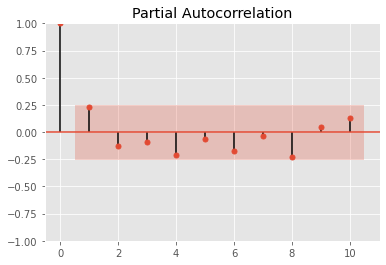

In [ ]:
pacf = plot_pacf(val['residual'].dropna(), lags = 10)

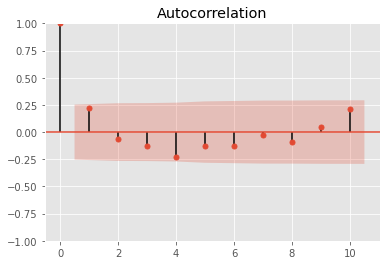

In [ ]:
acf = plot_acf(val['residual'].dropna(), lags = 10)

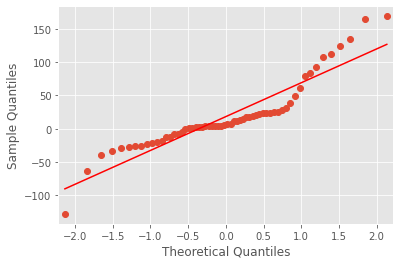

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

#Using auto_arima to fit and find best model

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima.arima import auto_arima

In [ ]:
auto_arima(train['y'], m = 12, D=1, seasonal=True, trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=inf, Time=14.29 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=13423.906, Time=0.12 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=13083.215, Time=2.46 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.76 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=13421.907, Time=0.10 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=13424.000, Time=0.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=12955.347, Time=6.74 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=9.74 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=12954.593, Time=7.15 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=13081.367, Time=2.21 sec
 ARIMA(0,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=6.56 sec
 ARIMA(0,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=3.08 sec
 ARIMA(0,0,1)(2,1,0)[12] intercept   : AIC=12955.399, Time=5.85 sec
 ARIMA(1,0,1)(2,1,0)[12] intercept   : A

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

#SARIMA (0,0,0) (2,1,0,12)

In [ ]:
# Fit the model
model = sm.tsa.statespace.SARIMAX(train['y'], order=(0,0,0), seasonal_order=(2,1,0,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                 1163
Model:             SARIMAX(2, 1, 0, 12)   Log Likelihood               -6473.304
Date:                  Thu, 02 Dec 2021   AIC                          12952.608
Time:                          10:26:14   BIC                          12967.754
Sample:                      01-31-1901   HQIC                         12958.325
                           - 11-30-1997                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.6739      0.019    -36.005      0.000      -0.711      -0.637
ar.S.L24      -0.3255      0.018    -17.903      0.000      -0.361      -0.290
sigma2      4468.7595    103.486    

In [ ]:
start=len(train)
end=len(train)+len(val)-1
predictions = model_fit.predict(start = start, end = end, dynamic = False)

In [ ]:
val['prediction'] = predictions

In [ ]:
sqrt(mean_squared_error(val['y'], val['prediction']))

48.914554243919476

In [ ]:
rainfall_std = df1['y'].std()
rainfall_std

136.67362778426596

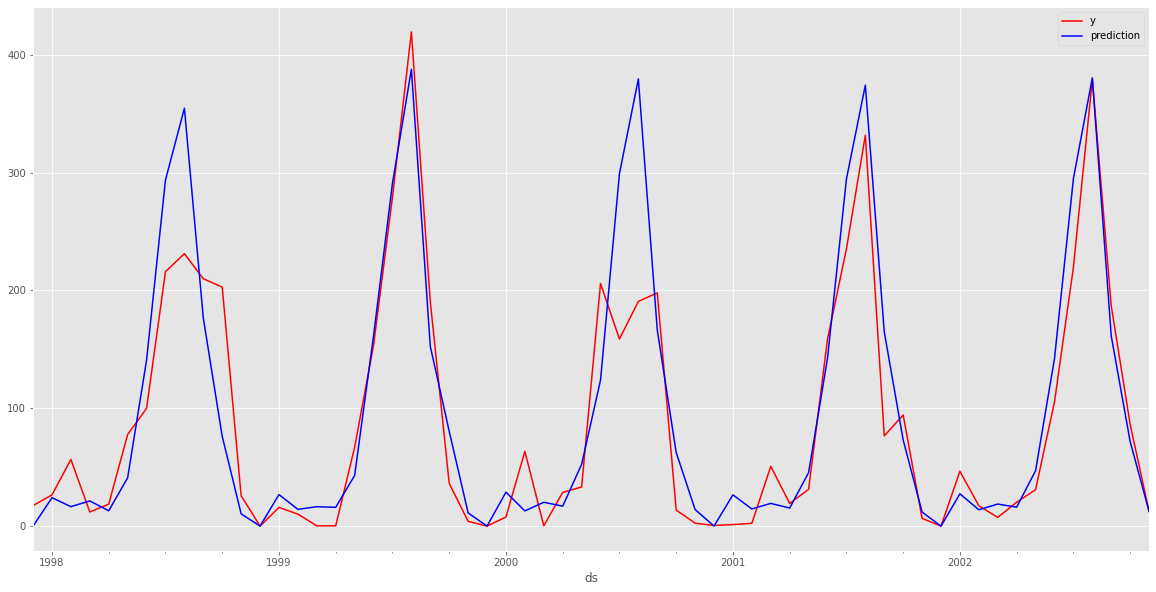

In [ ]:
axl = val.plot(kind='line', y='y', color='red', figsize=(20, 10))
val.plot(kind='line', y='prediction', color='blue', ax = axl)

**Conclusion: Rainfall Mean Square Error is 60% less than Standard Deviation and 33% Less than Baseline Model. Thus better fit. But We can still do better**

In [ ]:
val['residual'] = val['prediction'] - val['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(val['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.17161910252843612


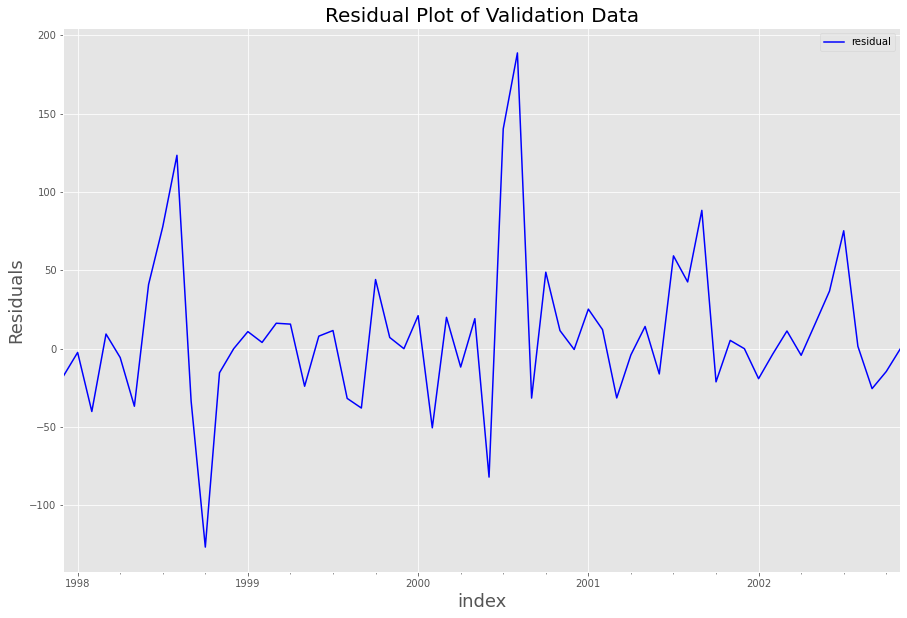

In [ ]:
axl = val.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

**Conclusion : In both the model we found residual for year 1998 and 2000 are high because of lack of rainfall in that year.**

In [ ]:
adf = adfuller(val['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-6.610989245586852, 6.377902354208492e-09, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 503.75060217156056)
P value of Test residuals = 6.377902354208492e-09


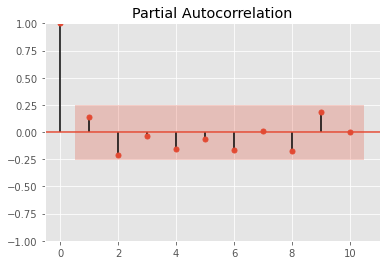

In [ ]:
pacf = plot_pacf(val['residual'].dropna(), lags = 10)

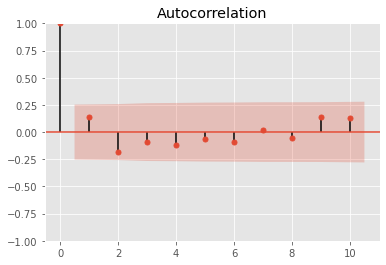

In [ ]:
acf = plot_acf(val['residual'].dropna(), lags = 10)

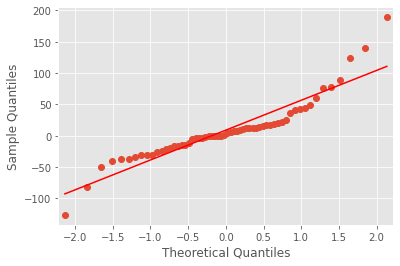

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

In [ ]:
auto_arima(train['y'], m = 12, seasonal=True, trace = True, suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=8.87 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=14765.628, Time=0.04 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=13468.522, Time=2.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=13986.119, Time=2.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=15330.069, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=14222.232, Time=0.10 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=inf, Time=9.34 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=4.54 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=13933.084, Time=2.06 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=12875.432, Time=12.78 sec
 ARIMA(1,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=14.61 sec
 ARIMA(1,0,0)(1,0,2)[12] intercept   : AIC=12902.698, Time=12.17 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=5.84 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=13359.733, Time=14.42 sec
 ARIMA(1,0,1)(2,0,1)[12] interc

ARIMA(order=(1, 0, 0), scoring_args={}, seasonal_order=(2, 0, 1, 12),
      suppress_warnings=True)

#SARIMA (1,0,0) (2,0,1,12)

In [ ]:
# Fit the model
model = sm.tsa.statespace.SARIMAX(train['y'], order=(1,0,0), seasonal_order=(2,0,1,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1163
Model:             SARIMAX(1, 0, 0)x(2, 0, [1], 12)   Log Likelihood               -6422.619
Date:                              Thu, 02 Dec 2021   AIC                          12855.238
Time:                                      10:34:05   BIC                          12880.532
Sample:                                  01-31-1901   HQIC                         12864.781
                                       - 11-30-1997                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0275      0.017     -1.626      0.104      -0.061       0.006
ar.S.L12       0.99

In [ ]:
start=len(train)
end=len(train)+len(val)-1
predictions = model_fit.predict(start = start, end = end, dynamic = False)

In [ ]:
val['prediction'] = predictions

In [ ]:
sqrt(mean_squared_error(val['y'], val['prediction']))

54.2003971312406

In [ ]:
rainfall_std = df1['y'].std()
rainfall_std

136.67362778426596

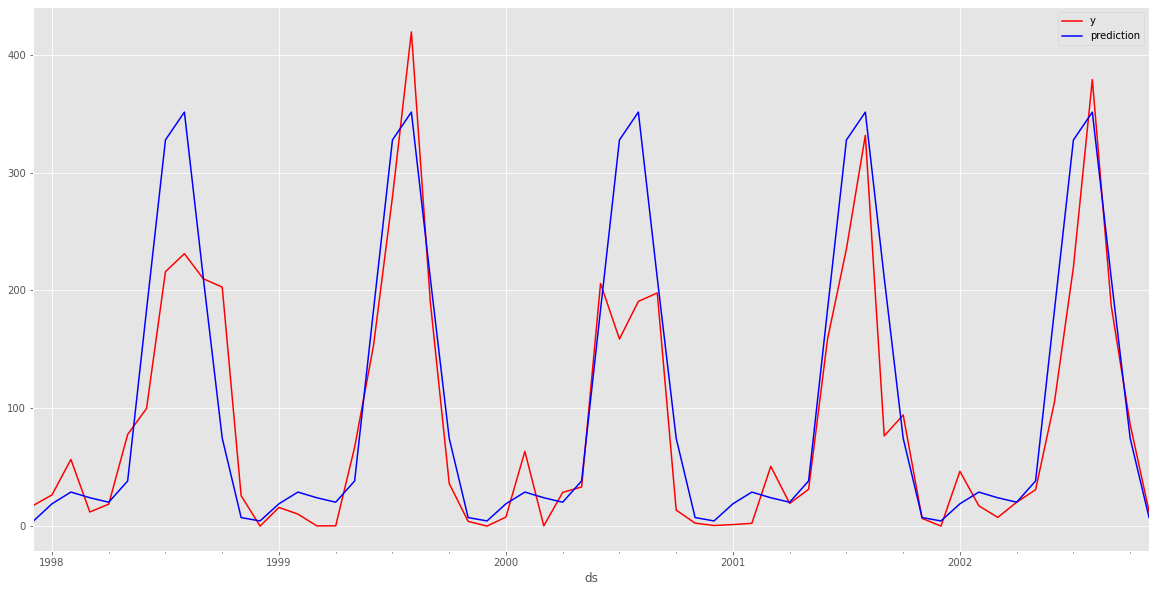

In [ ]:
axl = val.plot(kind='line', y='y', color='red', figsize=(20, 10))
val.plot(kind='line', y='prediction', color='blue', ax = axl)

**Conclusion: Rainfall Mean Square Error is 60% less than Standard Deviation and 33% Less than Baseline Model. Thus better fit. But We can still do better**

In [ ]:
val['residual'] = val['prediction'] - val['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(val['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.010739122063570075


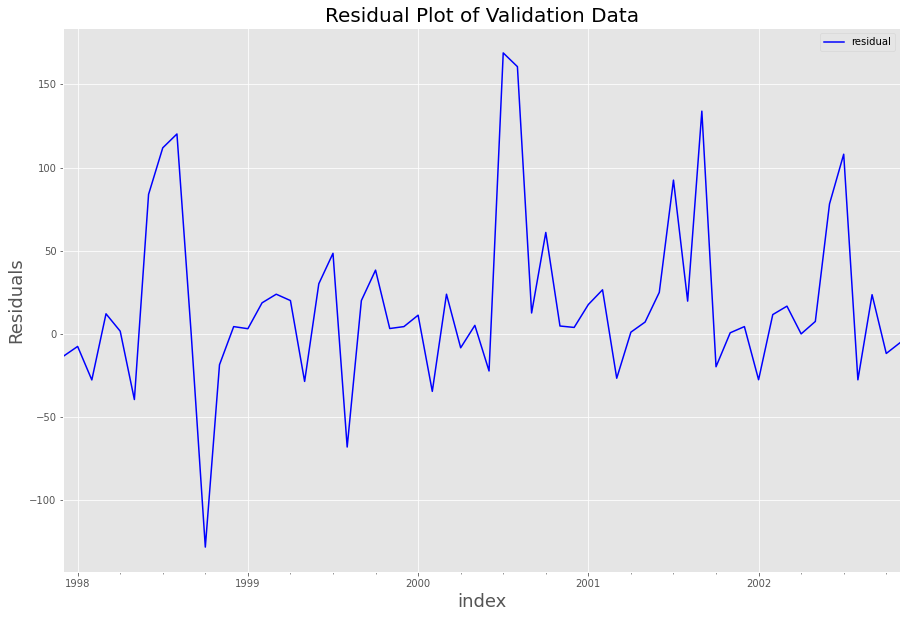

In [ ]:
axl = val.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

**Conclusion : In both the model we found residual for year 1998 and 2000 are high because of lack of rainfall in that year.**

In [ ]:
adf = adfuller(val['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-6.079597895860608, 1.1003279252486917e-07, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 508.05907199116945)
P value of Test residuals = 1.1003279252486917e-07


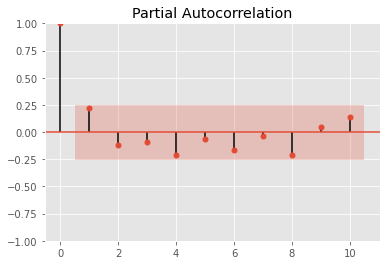

In [ ]:
pacf = plot_pacf(val['residual'].dropna(), lags = 10)

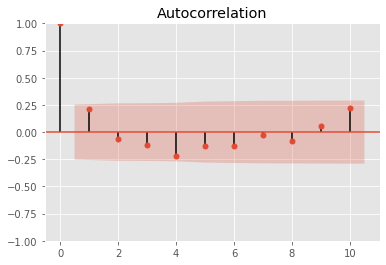

In [ ]:
acf = plot_acf(val['residual'].dropna(), lags = 10)

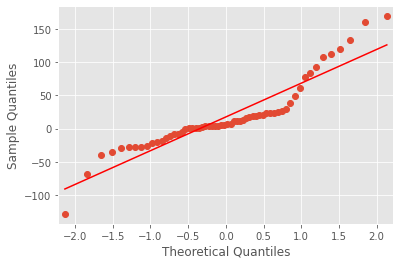

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

#SARIMA (1,0,0) (1,0,1,12)

In [ ]:
# Fit the model
model = sm.tsa.statespace.SARIMAX(train['y'], order=(1,0,0), seasonal_order=(1,0,1,12))
model_fit = model.fit(disp=False)
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                 1163
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 12)   Log Likelihood               -6423.615
Date:                              Thu, 02 Dec 2021   AIC                          12855.231
Time:                                      10:45:32   BIC                          12875.466
Sample:                                  01-31-1901   HQIC                         12862.865
                                       - 11-30-1997                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0254      0.020     -1.282      0.200      -0.064       0.013
ar.S.L12       0.99

In [ ]:
start=len(train)
end=len(train)+len(val)-1
predictions = model_fit.predict(start = start, end = end, dynamic = False)

In [ ]:
val['prediction'] = predictions

In [ ]:
sqrt(mean_squared_error(val['y'], val['prediction']))

53.43545193478045

In [ ]:
rainfall_std = df1['y'].std()
rainfall_std

136.67362778426596

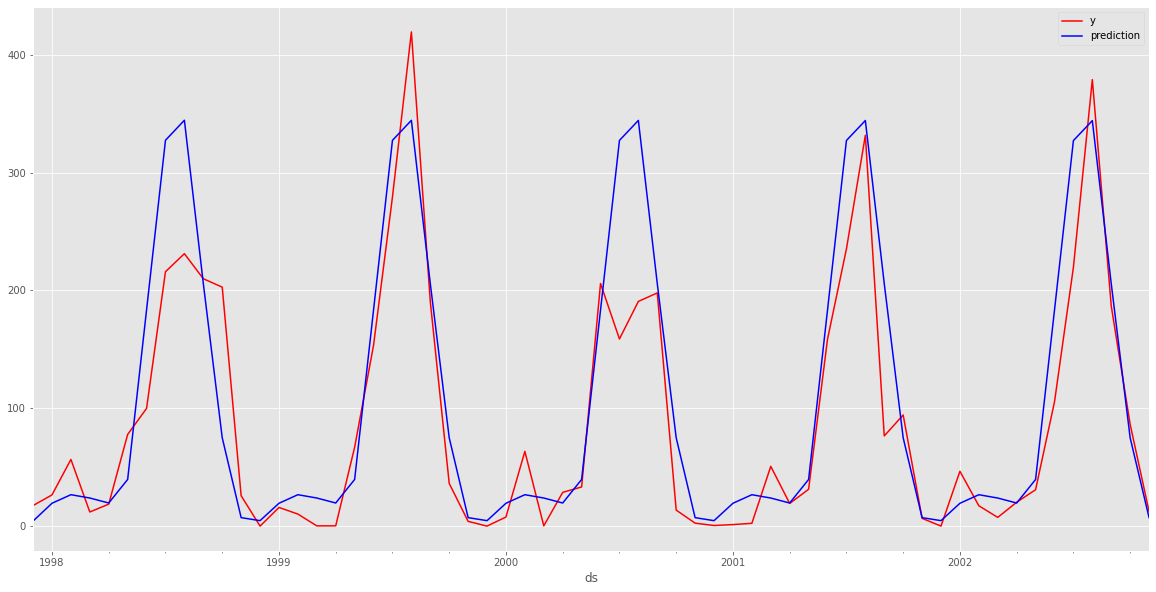

In [ ]:
axl = val.plot(kind='line', y='y', color='red', figsize=(20, 10))
val.plot(kind='line', y='prediction', color='blue', ax = axl)

**Conclusion: Rainfall Mean Square Error is 60% less than Standard Deviation and 33% Less than Baseline Model. Thus better fit. But We can still do better**

In [ ]:
val['residual'] = val['prediction'] - val['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(val['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.015545034555823097


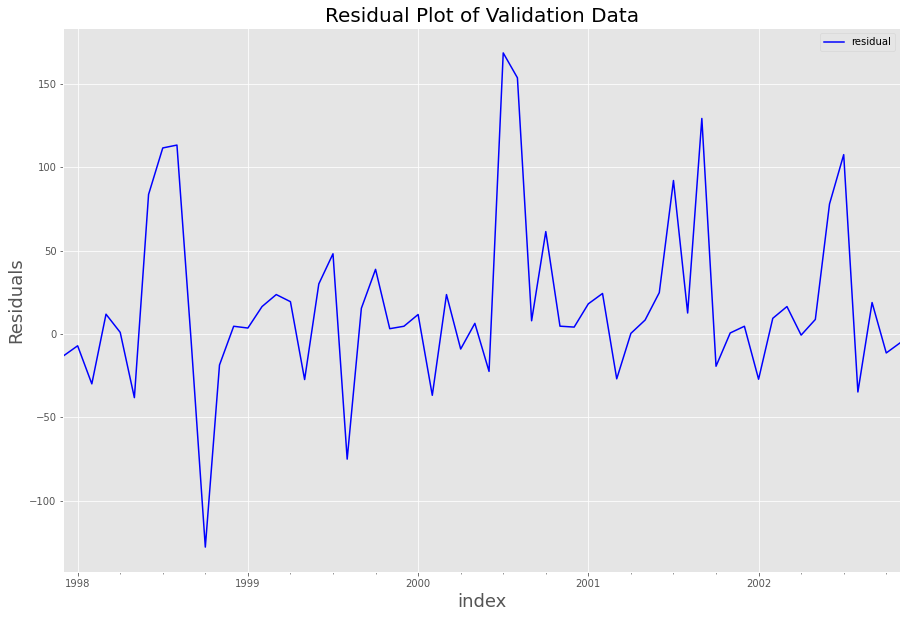

In [ ]:
axl = val.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

**Conclusion : In both the model we found residual for year 1998 and 2000 are high because of lack of rainfall in that year.**

In [ ]:
adf = adfuller(val['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-6.192668972469401, 6.069478491852312e-08, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 507.82414138598267)
P value of Test residuals = 6.069478491852312e-08


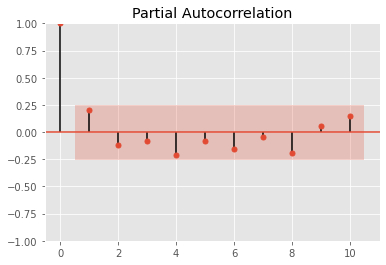

In [ ]:
pacf = plot_pacf(val['residual'].dropna(), lags = 10)

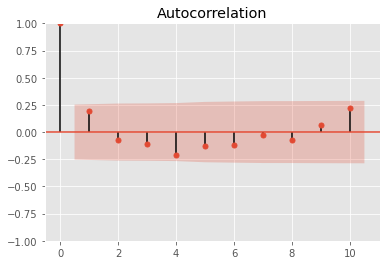

In [ ]:
acf = plot_acf(val['residual'].dropna(), lags = 10)

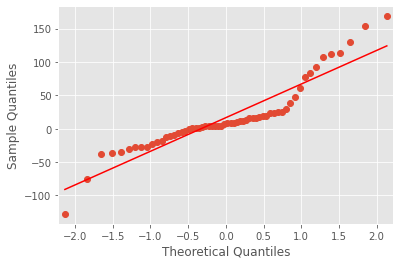

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

#Prophet

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet

In [ ]:
my_model = Prophet(interval_width=0.95)

In [ ]:
df1.reset_index(inplace = True)

In [ ]:
train = df1[:-60]
val = df1[-60: ]

In [ ]:
train

,ds,Year,month,y,Day
0,1901-01-31,1901,1,55.743,28
1,1901-02-28,1901,2,70.255,28
2,1901-03-31,1901,3,5.934,28
3,1901-04-30,1901,4,16.315,28
4,1901-05-31,1901,5,29.990,28
...,...,...,...,...,...
1158,1997-07-31,1997,7,312.932,28
1159,1997-08-31,1997,8,397.836,28
1160,1997-09-30,1997,9,169.373,28
1161,1997-10-31,1997,10,29.675,28


In [ ]:
my_model.fit(train)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
predict = my_model.predict(val)

In [ ]:
predict

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1997-12-31,102.834457,-110.665286,106.495008,102.834457,102.834457,-103.778320,-103.778320,-103.778320,-103.778320,-103.778320,-103.778320,0.0,0.0,0.0,-0.943863
1,1998-01-31,102.821866,-102.444641,125.698210,102.821866,102.821866,-88.919525,-88.919525,-88.919525,-88.919525,-88.919525,-88.919525,0.0,0.0,0.0,13.902341
2,1998-02-28,102.810494,-81.716898,153.409257,102.810224,102.811162,-72.614587,-72.614587,-72.614587,-72.614587,-72.614587,-72.614587,0.0,0.0,0.0,30.195908
3,1998-03-31,102.797904,-90.205207,131.909021,102.797285,102.799306,-81.569368,-81.569368,-81.569368,-81.569368,-81.569368,-81.569368,0.0,0.0,0.0,21.228536
4,1998-04-30,102.785720,-88.612488,133.382621,102.783702,102.788566,-85.433133,-85.433133,-85.433133,-85.433133,-85.433133,-85.433133,0.0,0.0,0.0,17.352587
5,1998-05-31,102.773130,-93.608290,146.062256,102.769552,102.777420,-71.937217,-71.937217,-71.937217,-71.937217,-71.937217,-71.937217,0.0,0.0,0.0,30.835912
6,1998-06-30,102.760945,70.951591,293.235563,102.755451,102.766850,77.555456,77.555456,77.555456,77.555456,77.555456,77.555456,0.0,0.0,0.0,180.316402
7,1998-07-31,102.748355,202.678662,426.981000,102.741185,102.756381,213.137807,213.137807,213.137807,213.137807,213.137807,213.137807,0.0,0.0,0.0,315.886162
8,1998-08-31,102.735765,249.634775,475.923384,102.725539,102.745929,262.114697,262.114697,262.114697,262.114697,262.114697,262.114697,0.0,0.0,0.0,364.850462
9,1998-09-30,102.723581,102.311810,339.244650,102.711258,102.735804,111.912761,111.912761,111.912761,111.912761,111.912761,111.912761,0.0,0.0,0.0,214.636341


In [ ]:
sqrt(mean_squared_error(val['y'], predict['yhat']))

54.26011336322244

In [ ]:
forecast = my_model.predict(df1)

In [ ]:
forecast

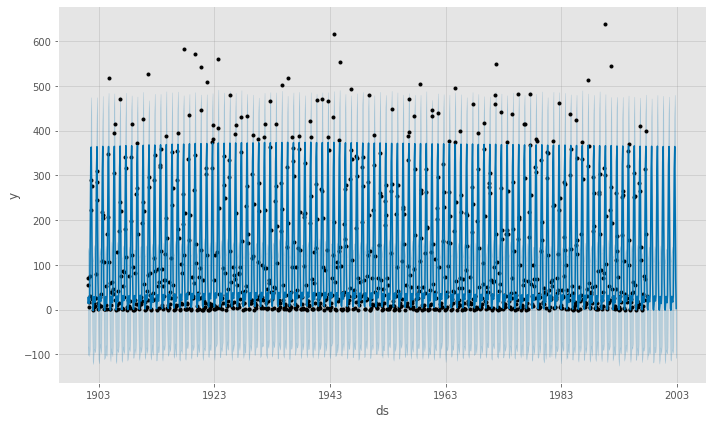

In [ ]:
my_model.plot(forecast, uncertainty=True);

In [ ]:
val.set_index('ds', inplace = True)
predict.set_index('ds', inplace = True)

In [ ]:
val['predict'] = predict['yhat']

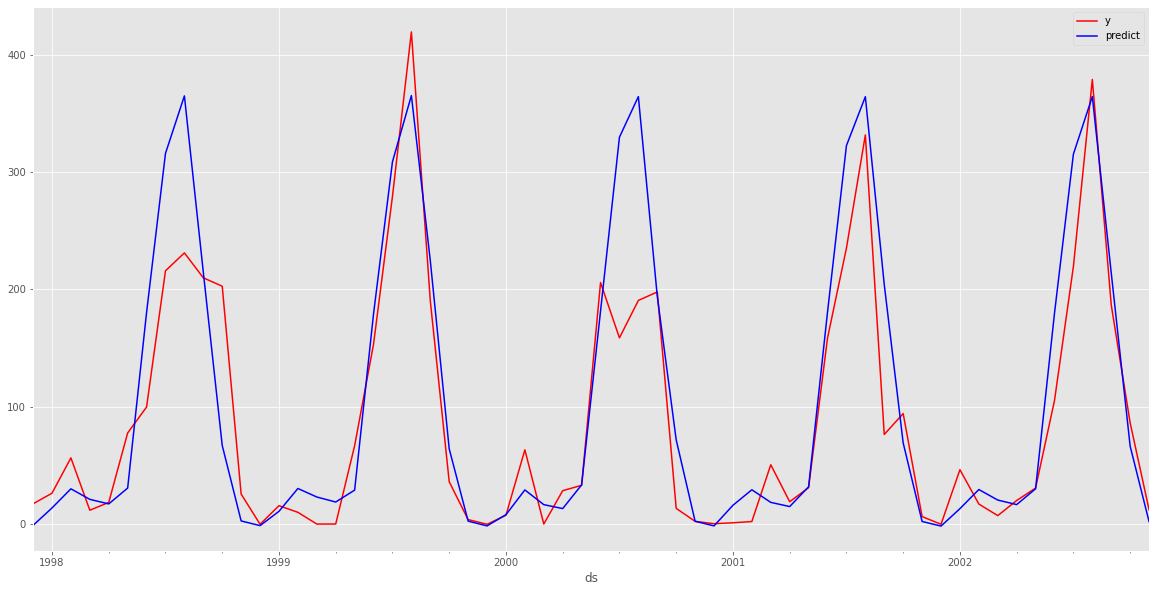

In [ ]:
axl = val.plot(kind='line', y='y', color='red', figsize=(20, 10))
val.plot(kind='line', y='predict', color='blue', ax = axl)

In [ ]:
val['residual'] = val['predict'] - val['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(val['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.03720829186483314


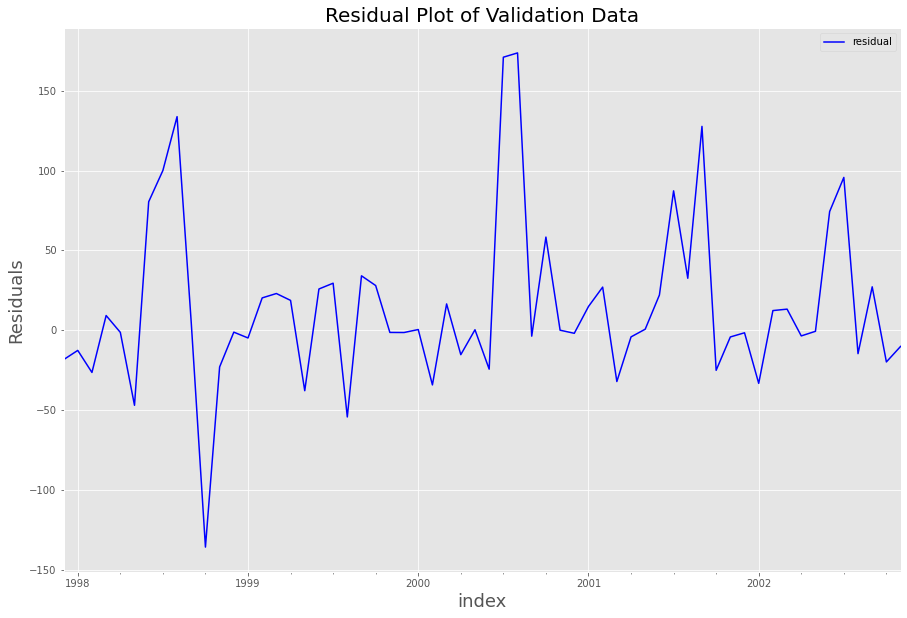

In [ ]:
axl = val.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

**Conclusion : In both the model we found residual for year 1998 and 2000 are high because of lack of rainfall in that year.**

In [ ]:
adf = adfuller(val['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-5.918897551060021, 2.533953352707012e-07, 0, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 508.5666369201974)
P value of Test residuals = 2.533953352707012e-07


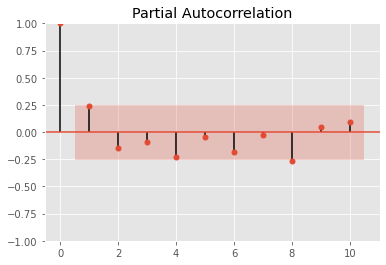

In [ ]:
pacf = plot_pacf(val['residual'].dropna(), lags = 10)

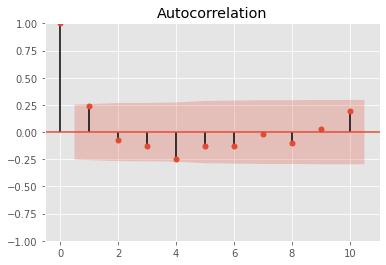

In [ ]:
acf = plot_acf(val['residual'].dropna(), lags = 10)

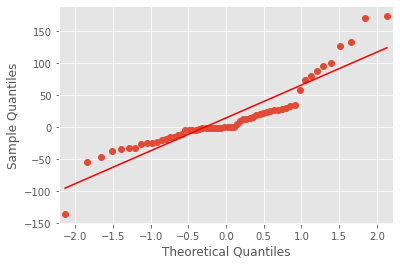

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

**Conclusion: Prophets model Residual have large deviation from normality hence not useful**

#LSTM

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
data = df1['y']

In [ ]:
data = np.expand_dims(data, axis=1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

In [ ]:
lookback = 25
X, Y = create_dataset(data, lookback)

In [ ]:
X_train = X[:-60]
X_test = X[-60:]
Y_train = Y[:-60]
Y_test = Y[-60:]

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1137, 25) (1137,) (60, 25) (60,)


In [ ]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1137, 25, 1) (1137,) (60, 25, 1) (60,)


In [ ]:
import keras

In [ ]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(lookback, 1)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=1)

Epoch 1/100
128/128 [==============================] - 4s 15ms/step - loss: 0.0516 - val_loss: 0.0383
Epoch 2/100
128/128 [==============================] - 1s 11ms/step - loss: 0.0421 - val_loss: 0.0350
Epoch 3/100
128/128 [==============================] - 1s 11ms/step - loss: 0.0380 - val_loss: 0.0309
Epoch 4/100
128/128 [==============================] - 1s 10ms/step - loss: 0.0326 - val_loss: 0.0259
Epoch 5/100
128/128 [==============================] - 1s 11ms/step - loss: 0.0264 - val_loss: 0.0216
Epoch 6/100
128/128 [==============================] - 1s 10ms/step - loss: 0.0222 - val_loss: 0.0236
Epoch 7/100
128/128 [==============================] - 1s 10ms/step - loss: 0.0212 - val_loss: 0.0208
Epoch 8/100
128/128 [==============================] - 1s 10ms/step - loss: 0.0204 - val_loss: 0.0227
Epoch 9/100
128/128 [==============================] - 1s 10ms/step - loss: 0.0202 - val_loss: 0.0195
Epoch 10/100
128/128 [==============================] - 1s 10ms/step - loss: 0.019

dict_keys(['loss', 'val_loss'])


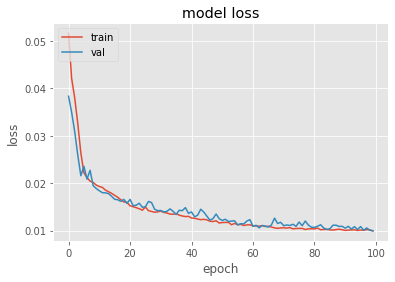

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [ ]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

In [ ]:
test = df1[-60:]
test['predict'] = test_prediction

In [ ]:
df1

,ds,Year,month,y,Day
0,1901-01-31,1901,1,55.743,28
1,1901-02-28,1901,2,70.255,28
2,1901-03-31,1901,3,5.934,28
3,1901-04-30,1901,4,16.315,28
4,1901-05-31,1901,5,29.990,28
...,...,...,...,...,...
1218,2002-07-31,2002,7,219.608,28
1219,2002-08-31,2002,8,378.858,28
1220,2002-09-30,2002,9,186.822,28
1221,2002-10-31,2002,10,86.296,28


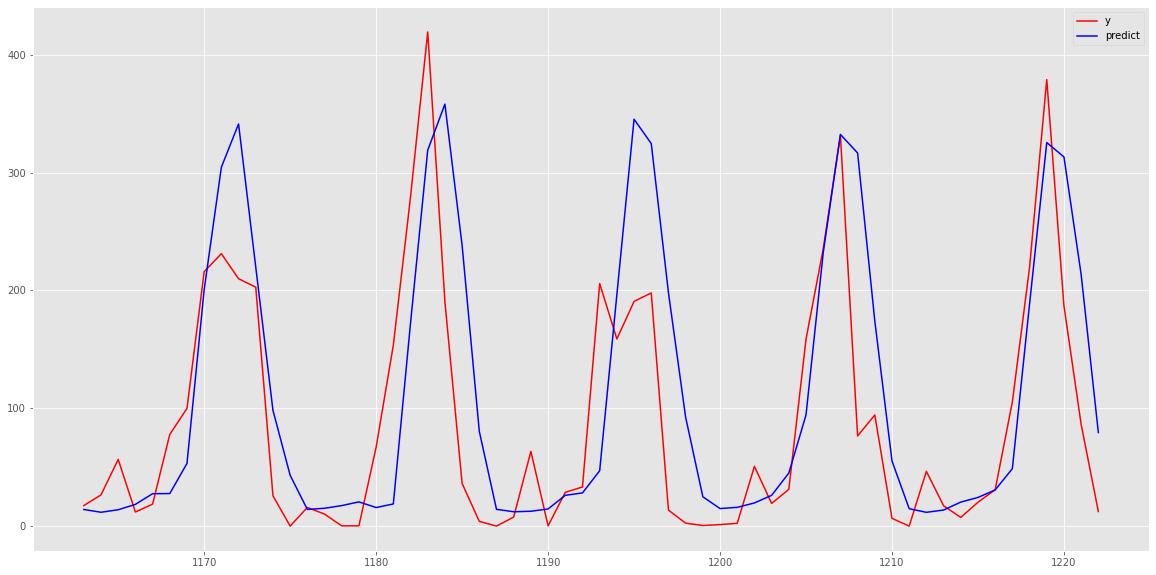

In [ ]:
axl = test.plot(kind='line', y='y', color='red', figsize=(20, 10))
test.plot(kind='line', y='predict', color='blue', ax = axl)

In [ ]:
sqrt(mean_squared_error(test['y'], test['predict']))

80.06736987773324

**RMSE of LSTM Model is highest aomng the 4 models**

In [ ]:
test['residual'] = test['predict'] - test['y']

In [ ]:
from scipy.stats import ttest_1samp
_, pvalue = ttest_1samp(test['residual'], 0)
print(f'P Value = {pvalue}')

P Value = 0.05262336844115236


#P Value is close to 5% if just barely passing the criteria to not reject the null hypothesis

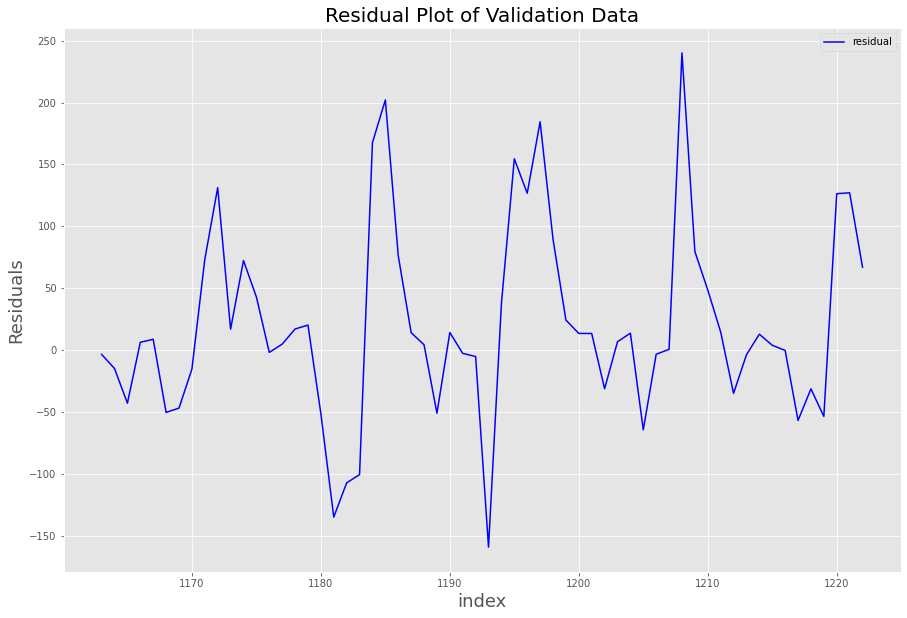

In [ ]:
axl = test.plot(kind='line', y='residual', color='blue', figsize=(15, 10))
plt.title('Residual Plot of Validation Data', size=20)
plt.xlabel('index', size=18)
plt.ylabel('Residuals', size=18)
plt.show()

**Conclusion : In LSTM model we found residual are not independent**

In [ ]:
adf = adfuller(test['residual'], autolag = 'AIC')
print(adf)
print(f'P value of Test residuals = {adf[1]}')

(-5.2316101745564865, 7.575422462401872e-06, 7, 52, {'1%': -3.562878534649522, '5%': -2.918973284023669, '10%': -2.597393446745562}, 548.5823113643381)
P value of Test residuals = 7.575422462401872e-06


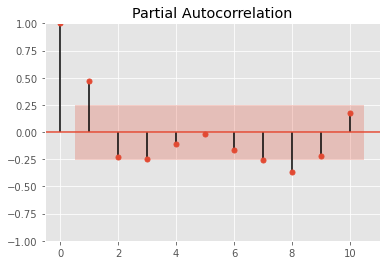

In [ ]:
pacf = plot_pacf(test['residual'].dropna(), lags = 10)

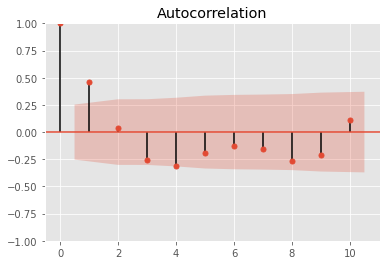

In [ ]:
acf = plot_acf(test['residual'].dropna(), lags = 10)

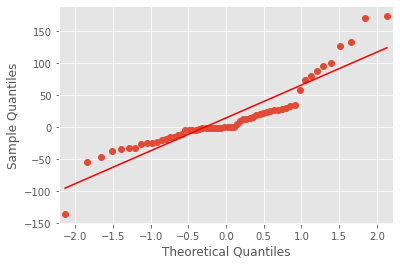

In [ ]:
sm.graphics.qqplot(val['residual'], line='r');

#**LSTM model residuals are not independent from each other. PACF and ACF plots shows that there is ARMA(1,1) correlation among residuals hence LSTM is worst fit the 4 models used for forecasting**